In [1]:
import numpy as np
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector

In [2]:
with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

In [3]:
Statevector(Fgate).conjugate().to_operator()

Operator([[ 3.33333333e-01+4.31408308e-32j,
            3.33333333e-01+3.84592537e-16j,
            3.33333333e-01-1.18582699e-15j,
           -4.33502530e-16+1.64030894e-15j],
          [ 3.33333333e-01-3.84592537e-16j,
            3.33333333e-01-7.39557099e-32j,
            3.33333333e-01-1.57041953e-15j,
           -4.33502530e-16+1.64030894e-15j],
          [ 3.33333333e-01+1.18582699e-15j,
            3.33333333e-01+1.57041953e-15j,
            3.33333333e-01+2.46519033e-32j,
           -4.33502530e-16+1.64030894e-15j],
          [-4.33502530e-16-1.64030894e-15j,
           -4.33502530e-16-1.64030894e-15j,
           -4.33502530e-16-1.64030894e-15j,
            8.63561362e-30+4.00032945e-47j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [4]:
omega = np.exp(2j*np.pi/3)

Fmtx = 1/np.sqrt(3) * np.array([[1, 1, 1, 0], [1, omega, omega * omega, 0], [1, omega*omega, omega, 0], [0, 0, 0, np.sqrt(3)]])

In [5]:
Fmtx.conjugate().transpose()

array([[ 0.57735027-0.j ,  0.57735027-0.j ,  0.57735027-0.j ,
         0.        -0.j ],
       [ 0.57735027-0.j , -0.28867513-0.5j, -0.28867513+0.5j,
         0.        -0.j ],
       [ 0.57735027-0.j , -0.28867513+0.5j, -0.28867513-0.5j,
         0.        -0.j ],
       [ 0.        -0.j ,  0.        -0.j ,  0.        -0.j ,
         1.        -0.j ]])

In [6]:
Fmtx

array([[ 0.57735027+0.j ,  0.57735027+0.j ,  0.57735027+0.j ,
         0.        +0.j ],
       [ 0.57735027+0.j , -0.28867513+0.5j, -0.28867513-0.5j,
         0.        +0.j ],
       [ 0.57735027+0.j , -0.28867513-0.5j, -0.28867513+0.5j,
         0.        +0.j ],
       [ 0.        +0.j ,  0.        +0.j ,  0.        +0.j ,
         1.        +0.j ]])

In [7]:
from qiskit.synthesis import TwoQubitWeylDecomposition

In [8]:
fcirctrans = TwoQubitWeylDecomposition(Fmtx.conjugate().transpose())

In [23]:
fdag = fcirctrans.circuit()
fdag.name = "F_dagger"

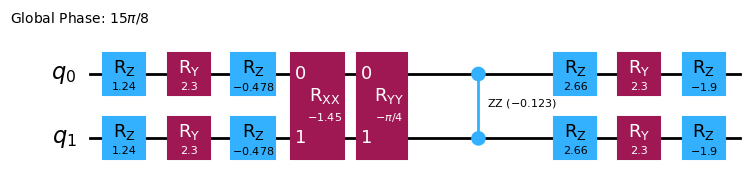

In [10]:
Fgate.draw('mpl')

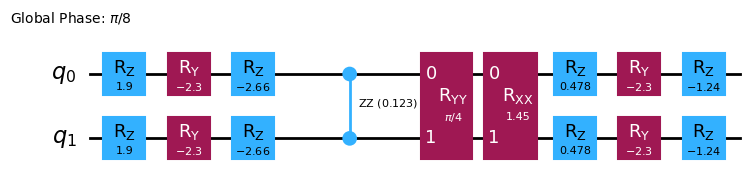

In [11]:
Fgate.inverse().draw('mpl')

In [24]:
with open('FDAGgate.qpy', 'wb') as fd:
    qpy.dump(fdag, fd)

In [25]:
with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

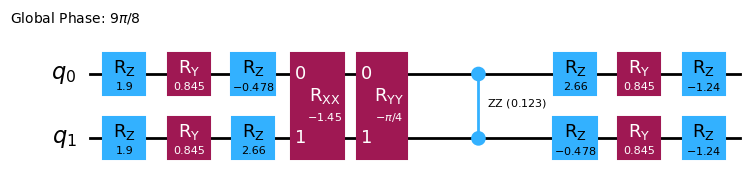

In [14]:
FDAGgate.draw('mpl')

In [15]:
Statevector(FDAGgate).draw('latex')

<IPython.core.display.Latex object>

In [16]:
Statevector(Fgate.inverse()).draw('latex')

<IPython.core.display.Latex object>

In [17]:
Statevector(Fgate).draw('latex')

<IPython.core.display.Latex object>

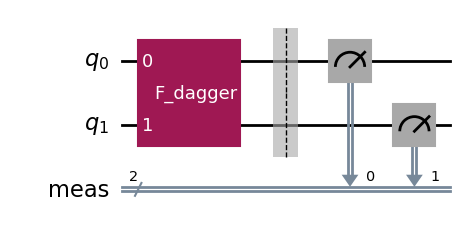

In [26]:
test = QuantumCircuit(2)
test.append(FDAGgate, [0, 1])
test.measure_all()
test.draw('mpl')

In [19]:
Statevector(test).draw('latex')

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [20]:
with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

In [45]:
bazaX = QuantumCircuit(2)
bazaX.append(Xgate, [0, 1])
bazaX.append(FDAGgate, [0, 1])

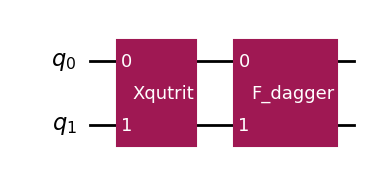

In [46]:
bazaX.draw('mpl')

In [47]:
Statevector(bazaX).draw('latex')

<IPython.core.display.Latex object>

In [43]:
bazaX = QuantumCircuit(2)
bazaX.x(0)
bazaX.append(Xgate, [0, 1])

In [44]:
Statevector(bazaX).draw('latex')

<IPython.core.display.Latex object>

In [40]:
np.sqrt(3)/6

np.float64(0.28867513459481287)

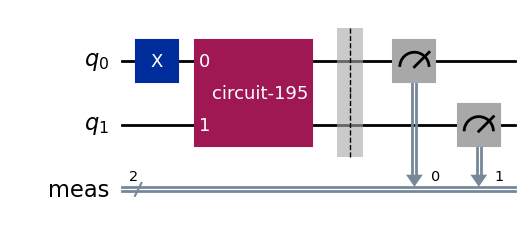

In [57]:
test2 = QuantumCircuit(2)
test2.x(0)
test2.append(FDAGgate, [0, 1])
test2.measure_all()
test2.draw('mpl')

In [45]:
Statevector(test2).draw('latex')

<IPython.core.display.Latex object>

In [48]:
omega/np.sqrt(3)

np.complex128(-0.2886751345948128+0.5000000000000001j)

In [49]:
np.sqrt(3)/6

np.float64(0.28867513459481287)

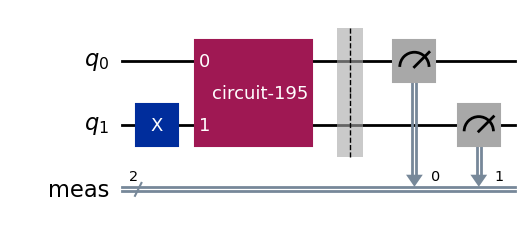

In [58]:
test3 = QuantumCircuit(2)
test3.x(1)
test3.append(FDAGgate, [0, 1])
test3.measure_all()
test3.draw('mpl')

In [59]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

job = sampler.run([test], shots = 10000)
data_pub = job.result()[0].data
counts = data_pub.meas.get_counts()

In [62]:
counts

{'00': 3390, '10': 3323, '01': 3287}

In [61]:
counter = {0:0, 1:0, 2:0}
phase = {'00':0, '01':1, '10':2}
for bits, n in counts.items():
    pairs = [bits[-2:], bits[-4:-2], bits[-6:-4], bits[-8:-6]]
    try:
        s = (phase[pairs[3]] + phase[pairs[2]] + phase[pairs[0]]) % 3
    except KeyError:
        continue
    counter[s] += n
print(counter)

{0: 0, 1: 0, 2: 0}
